# Explore the dataset for concept drift

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
filename = './datasets/ArtificialDataSets/circleG/dataCircleGSev1Sp1Train.csv'

df = pd.read_csv(filename, header=None)
print("Shape of df = ", df.shape)
df.head(10)

Shape of df =  (2000, 4)


,0,1,2,3
0,0.350395,0.095046,0.0,NaN
1,0.473468,0.583694,1.0,NaN
2,0.115968,0.078085,0.0,NaN
3,0.447701,0.313451,1.0,NaN
4,0.192150,0.471360,0.0,NaN
5,0.357969,0.587134,1.0,NaN
6,0.360822,0.336477,0.0,NaN
7,0.457335,0.621747,1.0,NaN
8,0.011081,0.233113,0.0,NaN
9,0.614379,0.464292,1.0,NaN


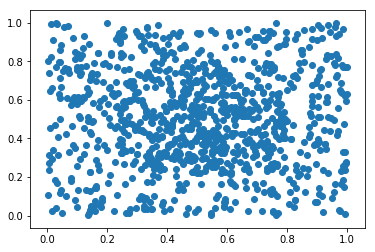

In [11]:
end_idx = 1000
plt.scatter(df[0][end_idx:].values, df[1][end_idx:].values)

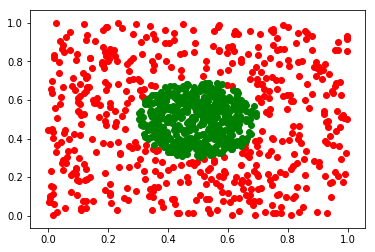

In [13]:
## Visualize
end_idx = 1000
color = ['r','g','b']
df_ = df[:end_idx]
for i in [0.0,1.0]:
    plt.scatter(df_[df_[2]==i][0].values, 
                df_[df_[2]==i][1].values, c = color[int(i)])

Drift occurs at step 1000.

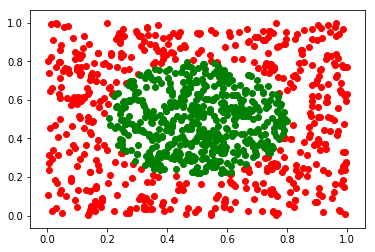

In [14]:
## Visualize
end_idx = 1000
color = ['r','g','b']
df_ = df[end_idx:]
for i in [0.0,1.0]:
    plt.scatter(df_[df_[2]==i][0].values, 
                df_[df_[2]==i][1].values, c = color[int(i)])

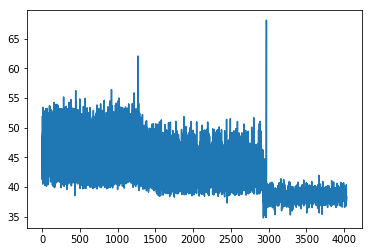

In [17]:
## Datasets w/ concept drift

folder = '../datasets/NAB/data/'
filename = 'realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv'

df_ = pd.read_csv(os.path.join(folder, filename))

plt.plot(df_['value'].values)

In [19]:
## read the labels
import json

label_files = ['../datasets/NAB/labels/combined_labels.json', 
               #'../datasets/NAB/labels/combined_windows.json'
              ]
timestamps_label = list()

for i in label_files:
    
    with open(i , 'r') as reader:
        jf = json.loads(reader.read())
        timestamps_label.extend(jf[filename])
        #print(jf[filename])
        #for j in jf[filename]:
        #    #print(j)
        #    timestamps_label.extend(j)
#timestamps_label = [k.split('.')[0]for k in timestamps_label]

df_['label'] = 0
df_[df_['timestamp'].isin(timestamps_label)]=1

In [21]:
df_.head(10)

,timestamp,value,label
0,2014-02-14 14:27:00,51.846,0
1,2014-02-14 14:32:00,44.508,0
2,2014-02-14 14:37:00,41.244,0
3,2014-02-14 14:42:00,48.568,0
4,2014-02-14 14:47:00,46.714,0
5,2014-02-14 14:52:00,44.986,0
6,2014-02-14 14:57:00,49.108,0
7,2014-02-14 15:02:00,40.470,0
8,2014-02-14 15:07:00,53.404,0
9,2014-02-14 15:12:00,45.400,0


In [23]:
## Export the df w/o header to csv (For eSNN.cpp)
df_.to_csv("./datasets/NAB/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv",
          header=False, index=False)